In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "1FluMaster.csv"
df = pd.read_csv(file_path, header=0)  # Skipping the first row if it's a duplicate header


/var/folders/cg/72yw7y6n4wxb3jgxj33txbt40000gn/T/ipykernel_57871/3770644932.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_geo, x="Total infected", y="State", palette="coolwarm")


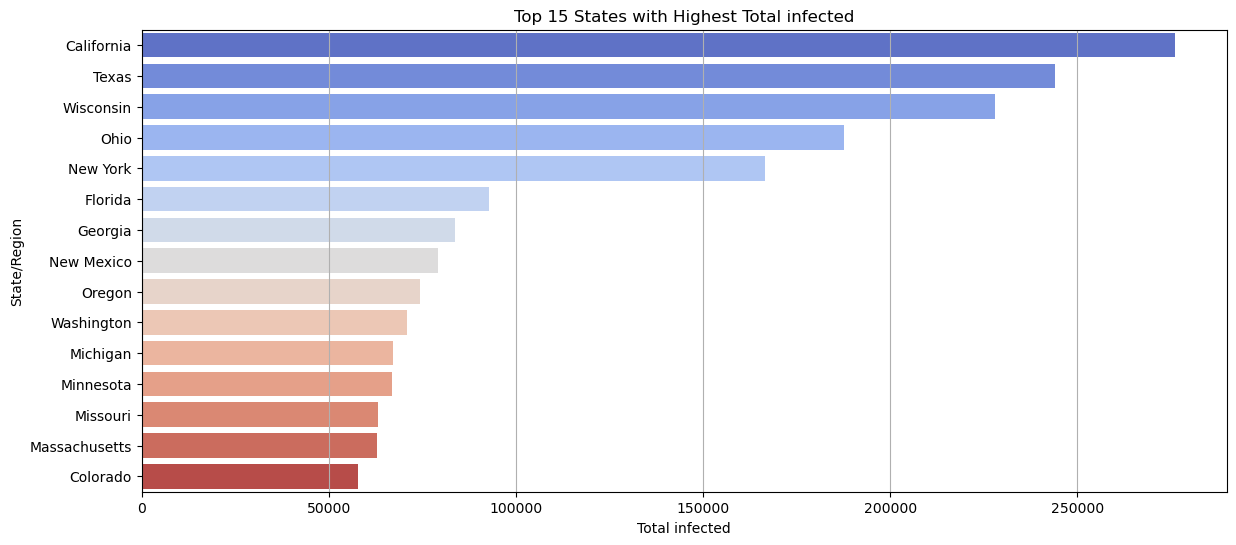

In [55]:
 #Replace 'X' with NaN and convert Total A + Total B	 to numeric
df = df.replace('X', pd.NA)
df["Total infected"] = df["Total A"] + df["Total B"]

 #Aggregate ILITOTAL cases by region (state)
df_geo = df.groupby("State")["Total infected"].sum().reset_index()

 #Sort the states by total cases for better visualization (Top 15)
df_geo = df_geo.sort_values(by="Total infected", ascending=False).head(15)

 #Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_geo, x="Total infected", y="State", palette="coolwarm")

plt.title("Top 15 States with Highest Total infected")
plt.xlabel("Total infected")
plt.ylabel("State/Region")
plt.grid(axis="x")

 #Show the plot
plt.show()



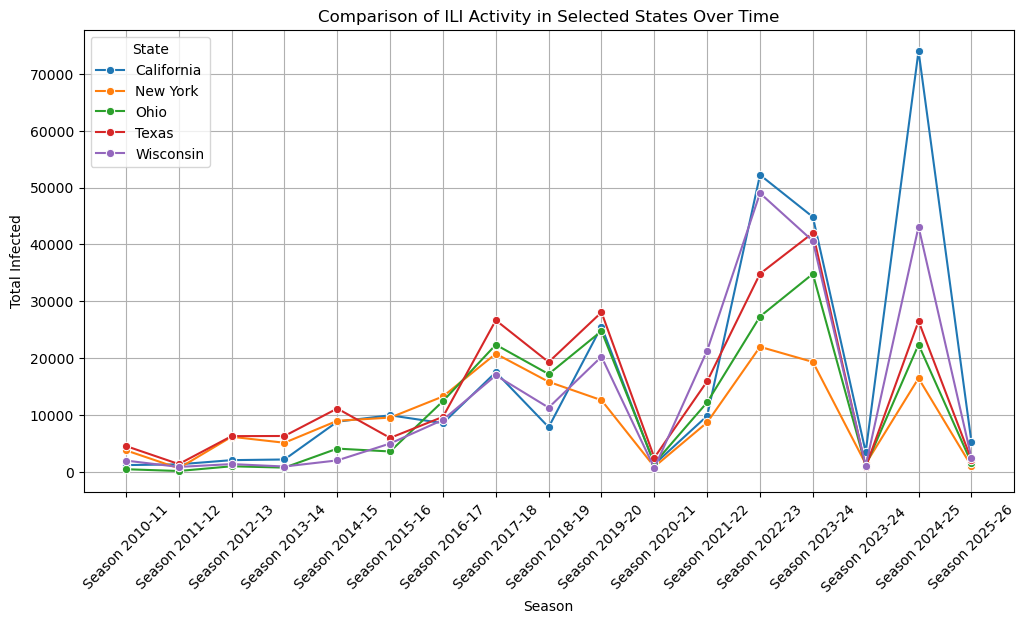

In [56]:
# Filter for selected states
selected_states = ["California", "Texas", "Wisconsin", "Ohio", "New York"]
df_filtered = df[df["State"].isin(selected_states)]

# Plot multiple line charts
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="Season", y="Total infected", hue="State", marker="o")

plt.xticks(rotation=45)
plt.title("Comparison of ILI Activity in Selected States Over Time")
plt.xlabel("Season")  # Adjust if using weeks instead
plt.ylabel("Total Infected")
plt.legend(title="State")
plt.grid(True)

plt.show()

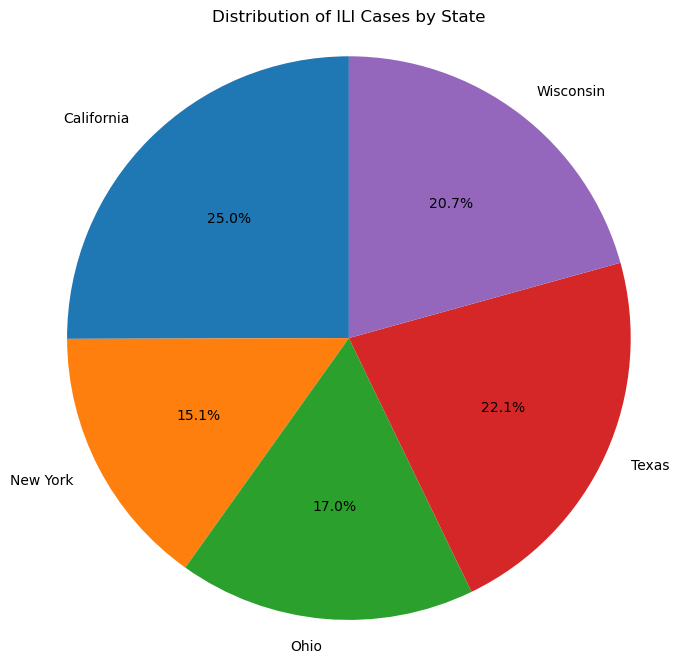

In [57]:
# Group the data by state and sum the 'Total infected' values
region_ili = df_filtered.groupby("State")["Total infected"].sum().reset_index()
selected_states = ["California", "Texas", "Wisconsin", "Ohio", "New York"]  
df_filtered = df[df["State"].isin(selected_states)]


# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(region_ili["Total infected"], labels=region_ili["State"], autopct='%1.1f%%', startangle=90)
plt.title("Distribution of ILI Cases by State")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

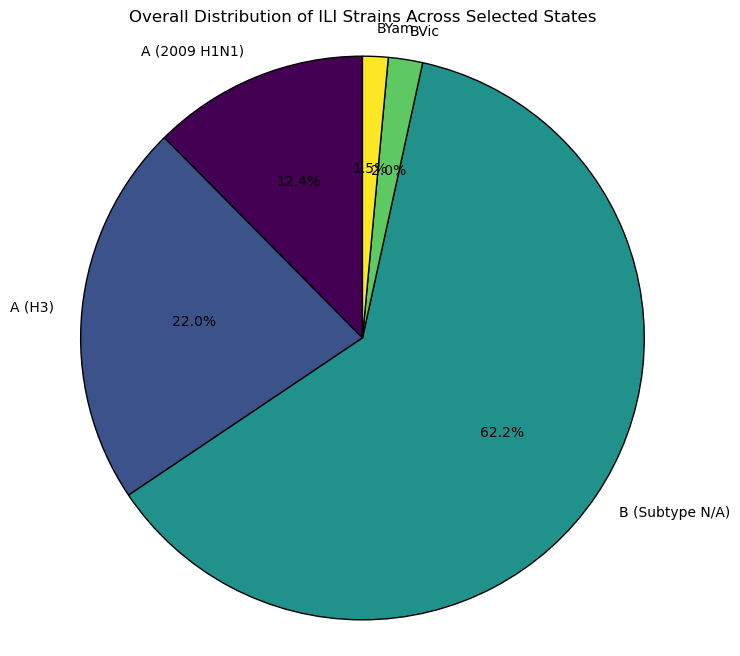

In [58]:
# Filter for selected states
selected_states = ["California", "Texas", "Wisconsin", "Ohio", "New York"]
df_filtered = df[df["State"].isin(selected_states)]

# Reshape: Convert strain columns into a 'Strain' column with values
strain_columns = ['A (2009 H1N1)', 'A (H3)', 'B (Subtype N/A)', 'BVic', 'BYam']
df_melted = df_filtered.melt(id_vars=["State"], value_vars=strain_columns, var_name="Strain", value_name="Cases")

# Group by Strain across all selected states
strain_totals = df_melted.groupby("Strain")["Cases"].sum()

# Define consistent colors for strains
color_palette = plt.cm.viridis(np.linspace(0, 1, len(strain_columns)))

# Create a single pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    strain_totals, 
    labels=strain_totals.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=color_palette,  # Consistent colors
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Overall Distribution of ILI Strains Across Selected States")
plt.axis('equal')  # Keep the pie chart circular
plt.show()